In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('delhiweatherdata.xlsx')
pd.set_option('display.max_columns',None)
df.head()

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Conditions
0,2016-01-01,23.8,8.0,14.8,8.5,NaN,0.0,7.6,125.52,NaN,1.0,28.6,73.11,1021.3,9.3,Partially cloudy
1,2016-01-02,21.8,8.3,14.6,NaN,NaN,0.0,13.0,153.29,NaN,1.2,11.4,73.29,1021.3,9.9,Clear
2,2016-01-03,22.1,8.0,13.9,6.8,NaN,0.0,14.8,180.04,NaN,0.9,3.7,75.24,1018.7,8.8,Clear
3,2016-01-04,23.2,8.0,15.4,NaN,NaN,0.0,7.6,56.61,NaN,0.7,22.1,75.10,1018.0,10.5,Clear
4,2016-01-05,26.3,11.3,18.1,NaN,NaN,0.0,9.4,77.04,NaN,1.1,46.1,71.74,1017.1,12.3,Partially cloudy


In [3]:
df.shape

(2015, 16)

In [4]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
datetime_feature=[feature for feature in df.columns if 'Date' in feature]
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature + datetime_feature]
categorical_feature=[feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Datetime feature Count {}".format(len(datetime_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 15
Discrete feature Count 0
Datetime feature Count 1
Continuous feature Count 14
Categorical feature Count 1


In [5]:
continuous_feature

['Maximum Temperature',
 'Minimum Temperature',
 'Temperature',
 'Wind Chill',
 'Heat Index',
 'Precipitation',
 'Wind Speed',
 'Wind Direction',
 'Wind Gust',
 'Visibility',
 'Cloud Cover',
 'Relative Humidity',
 'Sea Level Pressure',
 'Dew Point']

In [6]:
categorical_feature

['Conditions']

In [7]:
datetime_feature

['Date time']

# EDA Exploratory Data Analysis

**Continuous Feature**

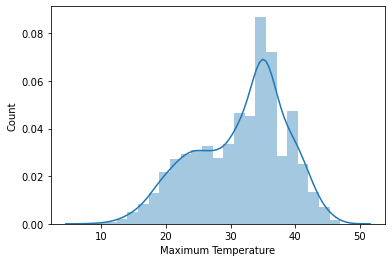

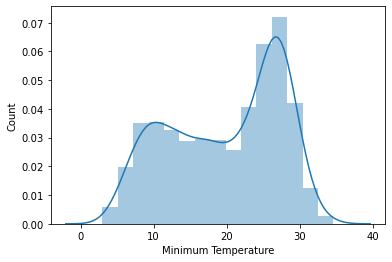

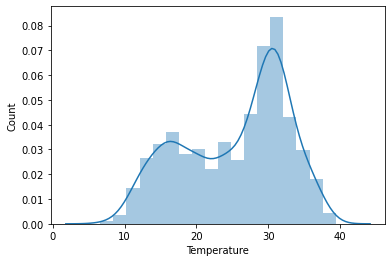

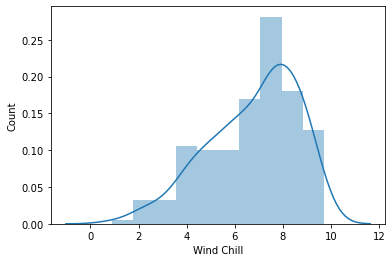

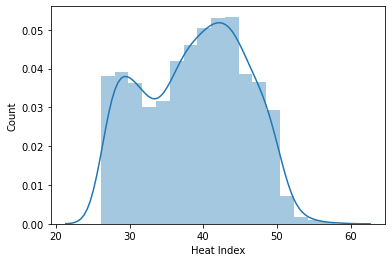

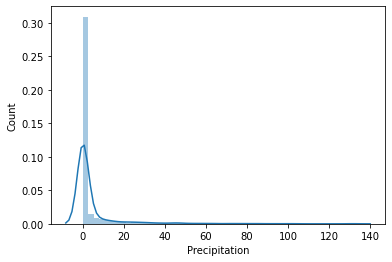

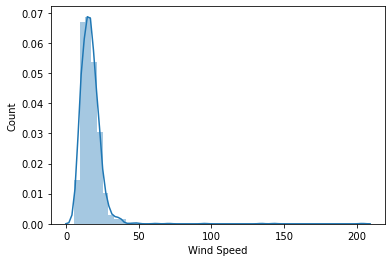

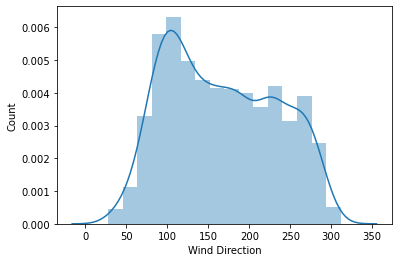

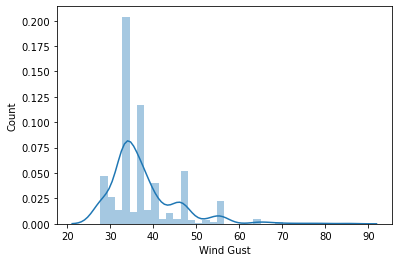

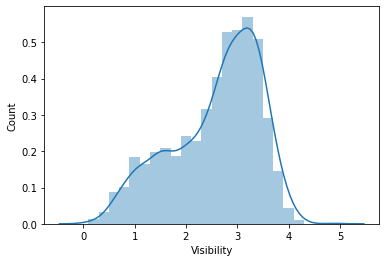

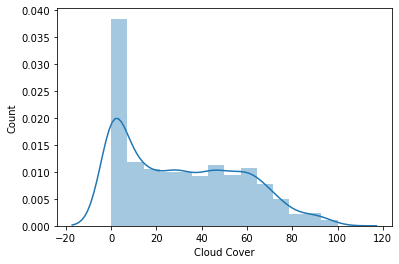

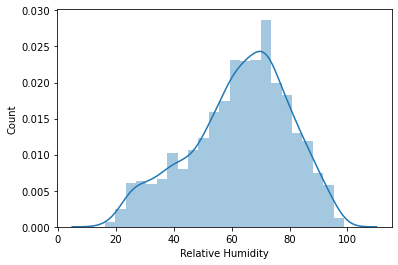

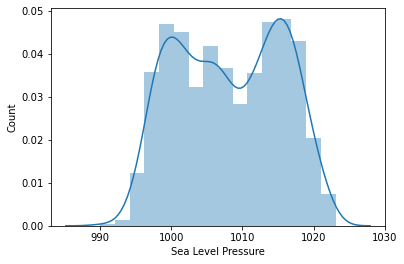

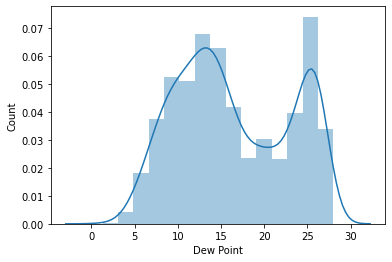

In [8]:
#distribution plot for continuous features
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**What we can infer from these data distribution plot**

most of the features are skewed and not following gaussian distribution so we need to normalise them

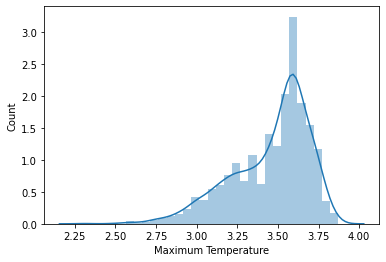

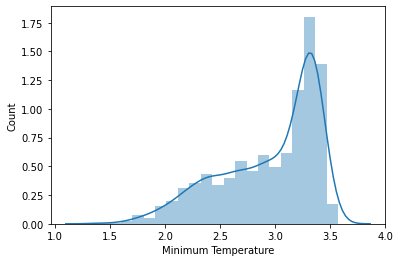

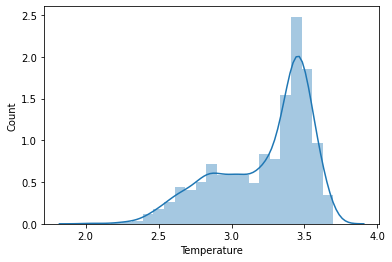

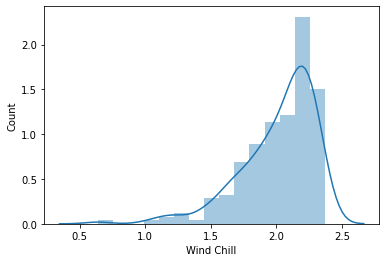

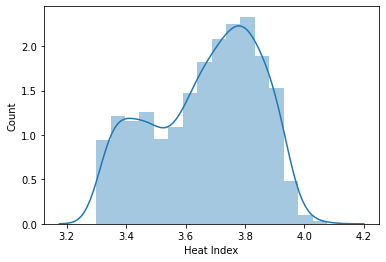

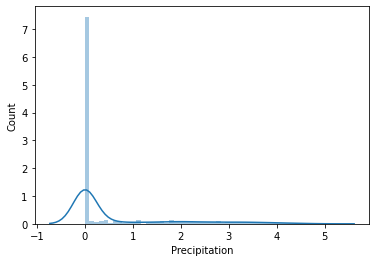

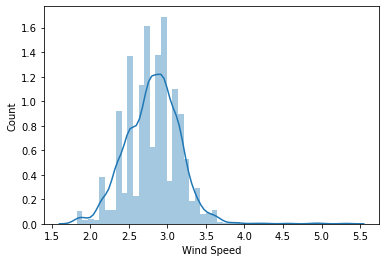

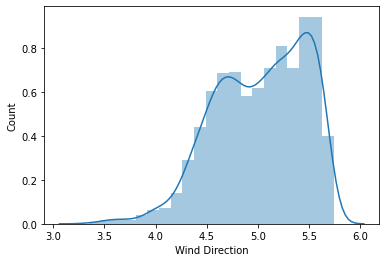

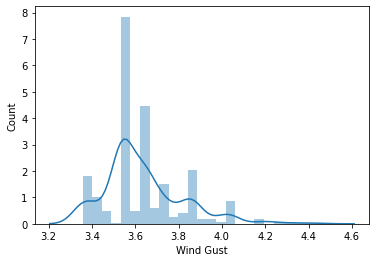

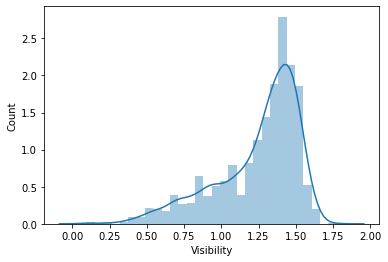

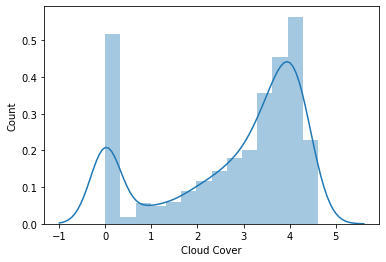

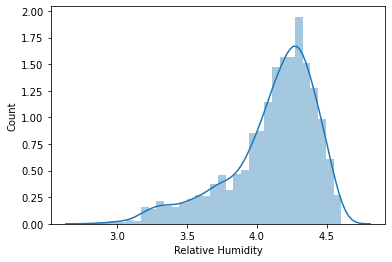

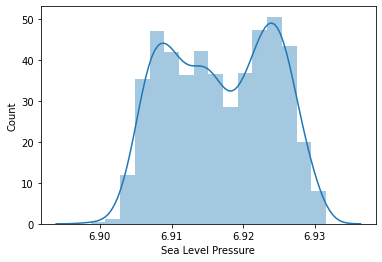

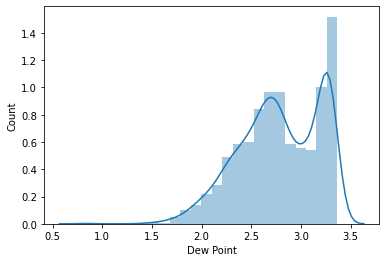

In [9]:
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log1p(data[feature])
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

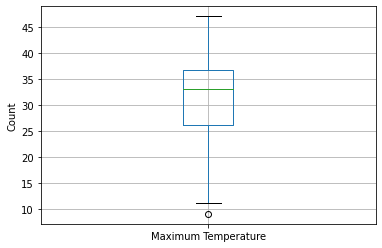

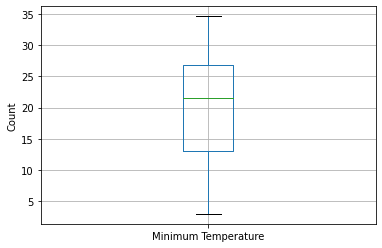

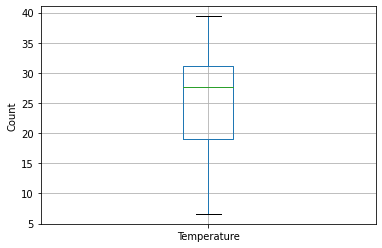

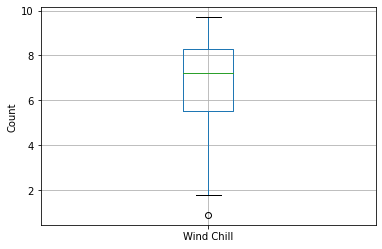

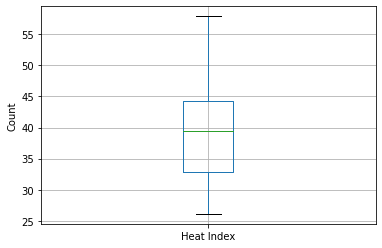

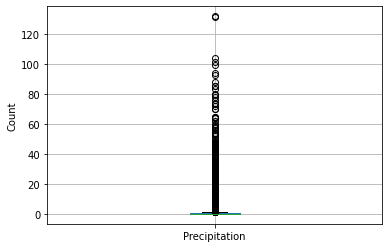

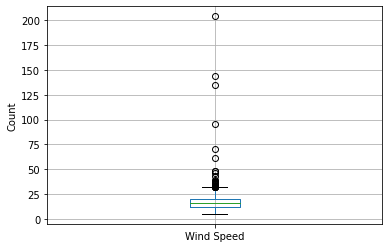

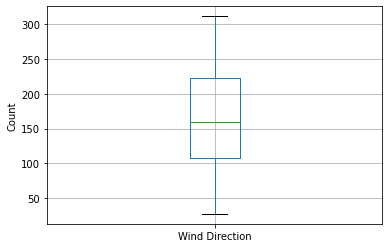

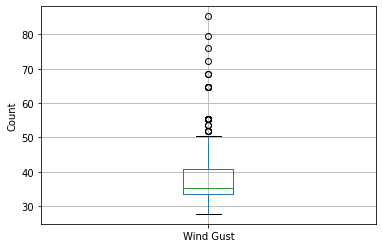

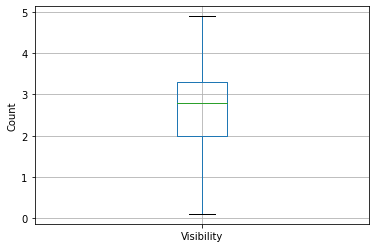

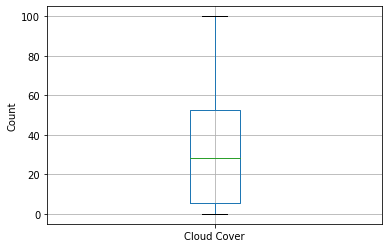

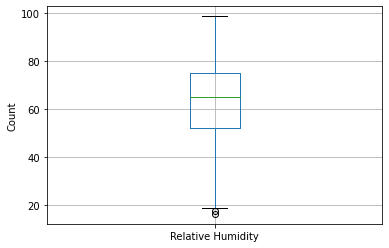

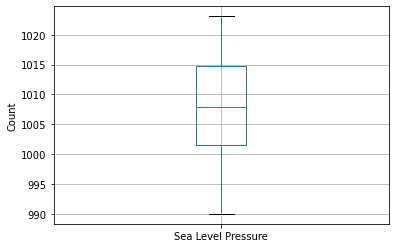

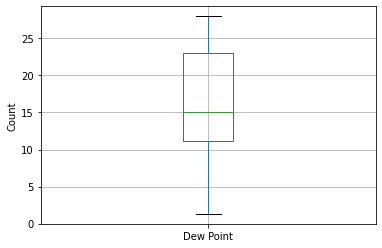

In [10]:
#box plot to check outliers
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel('Count')
    plt.show()

**Insights to be drawn from here**
1. precipitation has a huge amount of outliers
2. windspeed and wind gust has few outliers
so these outliers can distort the distribution and affect prediction so we have to remove these feature or outlier if required

**Handling Outliers**

In [11]:
IQR=df['Maximum Temperature'].quantile(0.75)-df['Maximum Temperature'].quantile(0.25)
lower_bridge=df['Maximum Temperature'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Maximum Temperature'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

10.449999999999994 52.45000000000001


In [12]:
df.loc[df['Maximum Temperature']<=10.45,'Maximum Temperature']=10.45

In [13]:
IQR=df['Wind Speed'].quantile(0.75)-df['Wind Speed'].quantile(0.25)
lower_bridge=df['Wind Speed'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Wind Speed'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.3499999999999961 31.950000000000003


In [14]:
df.loc[df['Wind Speed']>=31.95,'Wind Speed']=31.95

In [15]:
IQR=df['Relative Humidity'].quantile(0.75)-df['Relative Humidity'].quantile(0.25)
lower_bridge=df['Relative Humidity'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Relative Humidity'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

17.7975 109.4175


In [16]:
df.loc[df['Relative Humidity']<=17.80,'Relative Humidity']=17.80

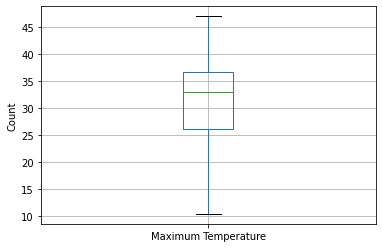

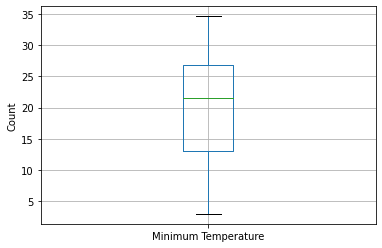

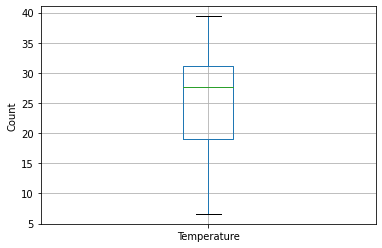

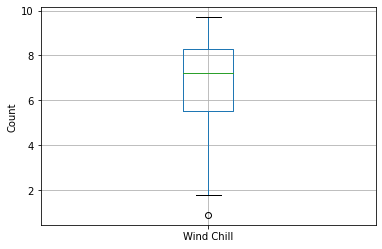

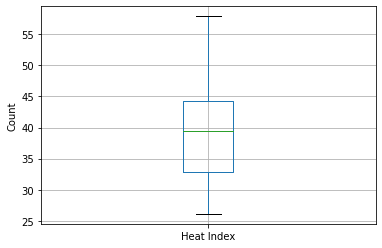

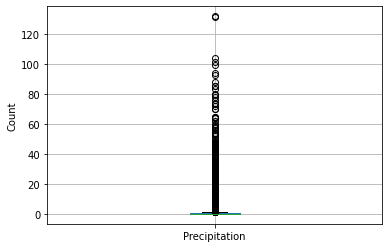

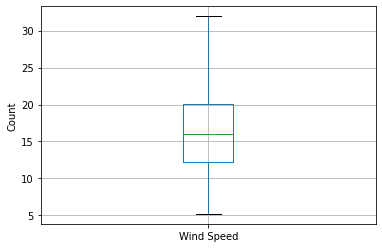

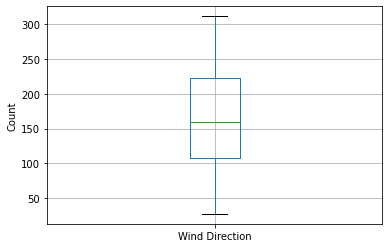

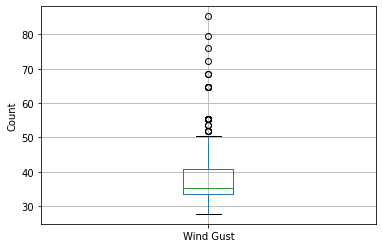

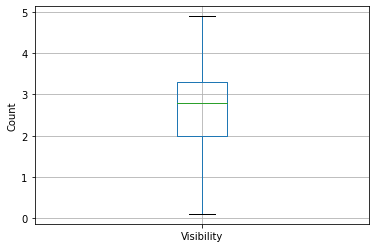

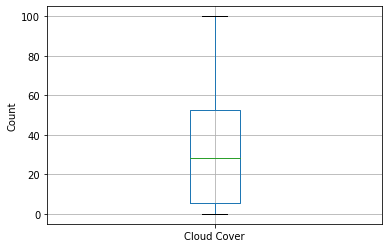

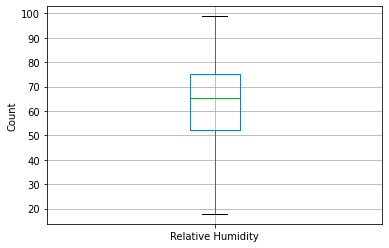

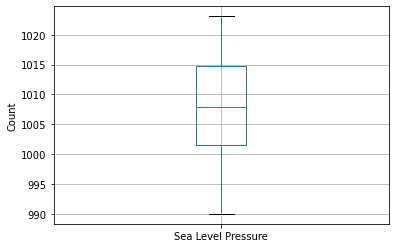

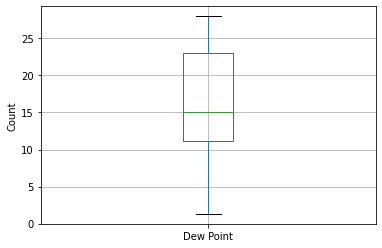

In [17]:
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel('Count')
    plt.show()

**Categorical Feature**

In [18]:
data=df.copy()
data['Conditions'].value_counts()

Clear                     907
Partially cloudy          547
Rain, Partially cloudy    427
Rain, Overcast             99
Rain                       27
Overcast                    8
Name: Conditions, dtype: int64

In [19]:
#for loop for separating two weather conditions into 2 columns
def sep_weather(dataframe,condition):
    conditions=list(dataframe[condition])
    condition1=[]
    condition2=[]
    for i in range(len(conditions)):
        condition1.append(conditions[i].split(sep=',')[0])
        
        if len(conditions[i].split(sep=','))==2:
            condition2.append(conditions[i].split(sep=',')[1].strip())
        
        else:
            condition2.append(np.nan)
            
    dataframe['Condition1']=condition1
    dataframe['Condition2']=condition2

In [20]:
sep_weather(df,'Conditions')

In [21]:
df.drop(['Conditions','Condition2'],axis=1,inplace=True)
df.head()

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,2016-01-01,23.8,8.0,14.8,8.5,NaN,0.0,7.6,125.52,NaN,1.0,28.6,73.11,1021.3,9.3,Partially cloudy
1,2016-01-02,21.8,8.3,14.6,NaN,NaN,0.0,13.0,153.29,NaN,1.2,11.4,73.29,1021.3,9.9,Clear
2,2016-01-03,22.1,8.0,13.9,6.8,NaN,0.0,14.8,180.04,NaN,0.9,3.7,75.24,1018.7,8.8,Clear
3,2016-01-04,23.2,8.0,15.4,NaN,NaN,0.0,7.6,56.61,NaN,0.7,22.1,75.10,1018.0,10.5,Clear
4,2016-01-05,26.3,11.3,18.1,NaN,NaN,0.0,9.4,77.04,NaN,1.1,46.1,71.74,1017.1,12.3,Partially cloudy


Clear               907
Rain                553
Partially cloudy    547
Overcast              8
Name: Condition1, dtype: int64


<AxesSubplot:xlabel='Condition1', ylabel='count'>

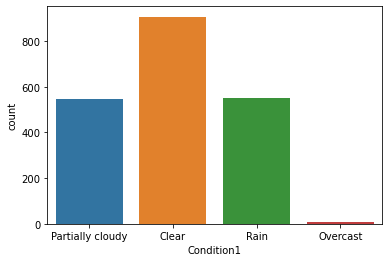

In [22]:
data=df.copy()
print(data['Condition1'].value_counts())
sns.countplot(data['Condition1'])

**Date time feature**

In [23]:
datetime_feature

['Date time']

In [24]:
#converting Date Time column to Day,Month,Year
def date(dataframe):
    dataframe['day']=pd.to_datetime(dataframe['Date time'],format="%y-%m-%d").dt.day
    dataframe['month']=pd.to_datetime(dataframe['Date time'],format="%y-%m-%d").dt.month
    dataframe['year']=pd.to_datetime(dataframe['Date time'],format="%y-%m-%d").dt.year

    dataframe.drop('Date time',axis=1,inplace=True)

In [25]:
date(df)
df.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1,day,month,year
0,23.8,8.0,14.8,8.5,NaN,0.0,7.6,125.52,NaN,1.0,28.6,73.11,1021.3,9.3,Partially cloudy,1,1,2016
1,21.8,8.3,14.6,NaN,NaN,0.0,13.0,153.29,NaN,1.2,11.4,73.29,1021.3,9.9,Clear,2,1,2016
2,22.1,8.0,13.9,6.8,NaN,0.0,14.8,180.04,NaN,0.9,3.7,75.24,1018.7,8.8,Clear,3,1,2016
3,23.2,8.0,15.4,NaN,NaN,0.0,7.6,56.61,NaN,0.7,22.1,75.10,1018.0,10.5,Clear,4,1,2016
4,26.3,11.3,18.1,NaN,NaN,0.0,9.4,77.04,NaN,1.1,46.1,71.74,1017.1,12.3,Partially cloudy,5,1,2016


# Feature Engineering

**missing values in dataset**

In [26]:
df.isnull().sum()/len(df)*100

Maximum Temperature     0.000000
Minimum Temperature     0.000000
Temperature             0.000000
Wind Chill             89.379653
Heat Index             25.905707
Precipitation           0.000000
Wind Speed              0.000000
Wind Direction          0.000000
Wind Gust              70.124069
Visibility              0.000000
Cloud Cover             0.000000
Relative Humidity       0.000000
Sea Level Pressure      0.000000
Dew Point               0.000000
Condition1              0.000000
day                     0.000000
month                   0.000000
year                    0.000000
dtype: float64

Where missing values is more than 70% will remove that column and removing precipitation column coz it will predict rain weather with 100% accuracy

In [27]:
df.drop(['Wind Chill','Wind Gust','Precipitation'],inplace=True,axis=1)

In [28]:
#resetting columns in order
def resetcol(dataframe):
    dataframe=dataframe[['day','month', 'year','Minimum Temperature', 
                         'Maximum Temperature', 'Temperature',
                         'Heat Index' , 'Wind Speed',
                         'Wind Direction', 'Visibility', 'Cloud Cover',
                         'Relative Humidity', 'Sea Level Pressure', 
                         'Dew Point', 'Condition1']]
    
    return dataframe

In [29]:
df=resetcol(df)
df

,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,1,1,2016,8.0,23.8,14.8,NaN,7.60,125.52,1.0,28.6,73.11,1021.3,9.3,Partially cloudy
1,2,1,2016,8.3,21.8,14.6,NaN,13.00,153.29,1.2,11.4,73.29,1021.3,9.9,Clear
2,3,1,2016,8.0,22.1,13.9,NaN,14.80,180.04,0.9,3.7,75.24,1018.7,8.8,Clear
3,4,1,2016,8.0,23.2,15.4,NaN,7.60,56.61,0.7,22.1,75.10,1018.0,10.5,Clear
4,5,1,2016,11.3,26.3,18.1,NaN,9.40,77.04,1.1,46.1,71.74,1017.1,12.3,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,3,7,2021,28.0,38.0,31.6,48.8,31.95,209.58,3.2,88.1,62.35,1000.7,23.2,Overcast
2011,4,7,2021,28.0,39.0,33.3,42.5,20.50,159.47,3.4,57.7,53.93,1002.2,22.2,Partially cloudy
2012,5,7,2021,29.0,39.9,33.6,45.8,14.80,234.74,3.6,51.3,49.11,1002.6,21.7,Partially cloudy
2013,6,7,2021,30.0,39.9,34.6,45.8,18.40,265.91,3.8,42.4,50.77,1000.8,22.7,Partially cloudy


**Train test split to prevent data leakage**

In [30]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=1)

# Handling Numerical Missing Values

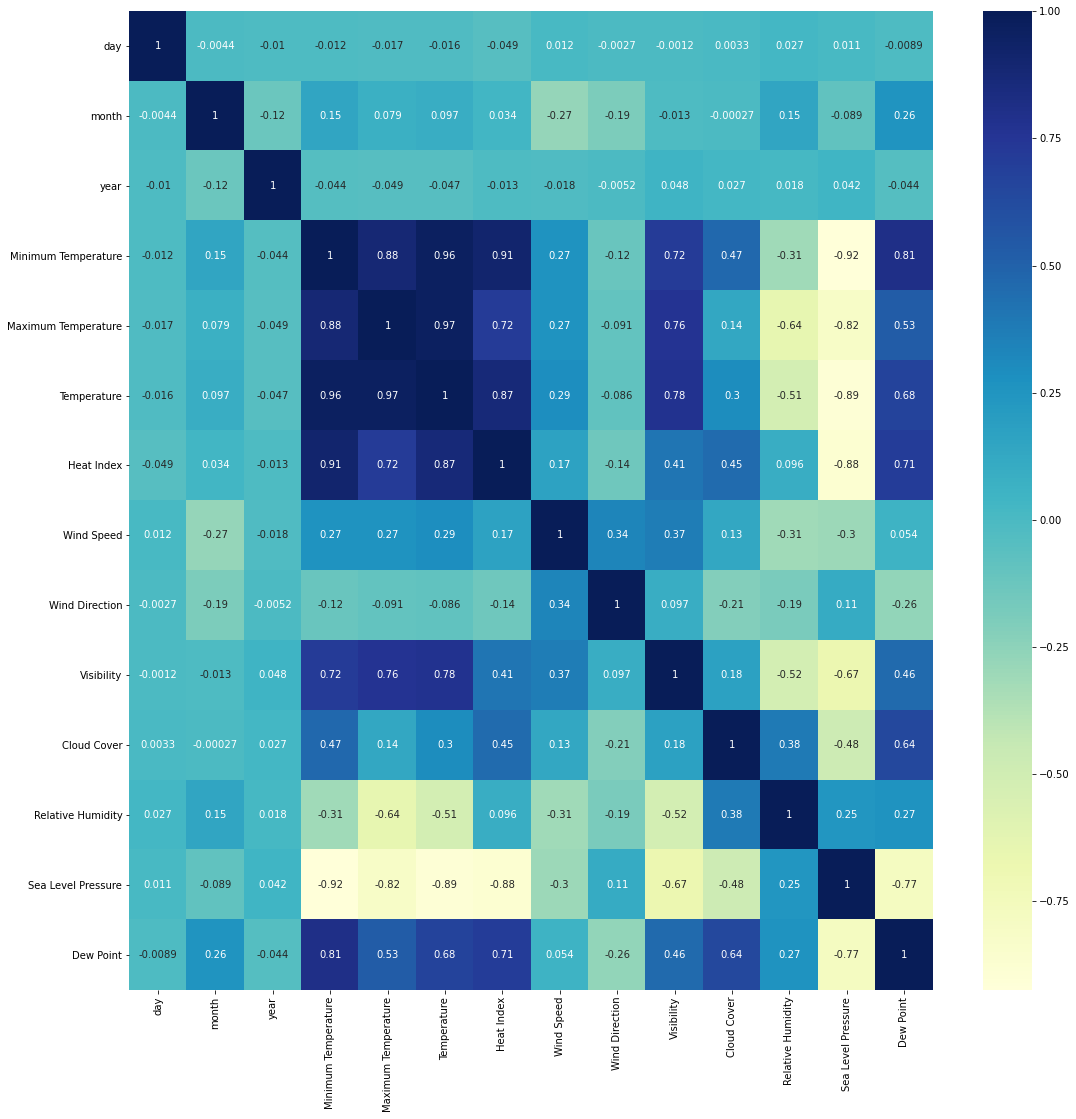

In [31]:
#Finiding Correlation b/w independent and dependent attributes

plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')

plt.show()

we can infer from correlation matrix that Heat index and Minimum Temperature are highly correlated

**Handling Numerical values for Train Data**

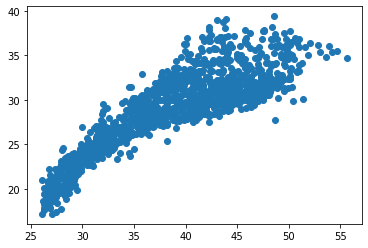

In [32]:
#plotting relationship b/w Heat Index and Temperature
plt.scatter(df_train['Heat Index'],df_train['Temperature'])
plt.show()

In [33]:
#handling numerical missing values for train dataset
heat_df=df_train[['Temperature','Heat Index']]
heat_without_null=heat_df[heat_df['Heat Index'].isna()==False]

X=heat_without_null['Temperature']
y=heat_without_null['Heat Index']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

linreg.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
pred=linreg.predict(np.array(X_test).reshape(-1,1))

from sklearn.svm import SVR
svr=SVR()

svr.fit(np.array(X_train).reshape(-1,1),np.array(y_train))
svr_pred=svr.predict(np.array(X_test).reshape(-1,1))

from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()

rfreg.fit(np.array(X_train).reshape(-1,1),np.array(y_train))
rf_pred=rfreg.predict(np.array(X_test).reshape(-1,1))

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))

print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))

MAE: 2.771851717501395
MSE: 11.971577413767976
MAE: 2.630828235544098
MSE: 11.87984298513341
MAE: 2.5829238639695733
MSE: 11.01051941487247


we are getting low MAE and MSE with SVR so we will use SVR

In [35]:
heat_null=heat_df[heat_df['Heat Index'].isna()]

W=heat_null['Temperature']
Z=heat_null['Heat Index']

predictions_train=svr.predict(np.array(W).reshape(-1,1))

In [36]:
heat=pd.DataFrame(predictions_train,columns=['Heat Index'])
heat.index=heat_null.index

#filling missing values in dataframe with the predicted heat index value
df_train['Heat Index'].fillna(heat['Heat Index'],inplace=True)

#Rounding off Heat Index Values to 2 decimal places
df_train['Heat Index']=round(df_train['Heat Index'],2)
df_train

C:\Users\karan rawat\.conda\envs\myenv\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\karan rawat\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
1322,15,8,2019,25.3,34.4,30.4,45.10,18.30,107.04,3.1,68.3,80.96,1000.6,26.6,Rain
1567,16,4,2020,23.6,39.0,30.8,38.20,16.60,247.63,3.4,34.4,33.62,1005.9,12.1,Partially cloudy
953,11,8,2018,28.0,35.0,31.7,46.70,18.40,244.83,3.4,79.5,74.81,997.0,26.5,Rain
1117,22,1,2019,13.0,18.0,15.2,30.29,22.30,95.38,1.8,66.9,94.96,1014.2,14.4,Rain
1994,17,6,2021,28.0,35.7,31.3,40.90,18.40,99.79,3.4,52.3,67.76,999.6,24.3,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,26,11,2020,15.0,24.7,19.2,27.22,11.20,204.25,2.3,49.7,65.39,1018.8,12.0,Rain
1096,1,1,2019,5.8,22.4,13.9,32.27,9.40,162.55,1.7,10.4,67.01,1020.2,7.0,Clear
1932,16,4,2021,21.0,39.6,28.8,38.70,31.95,160.33,2.4,53.5,39.57,1006.8,10.9,Rain
235,23,8,2016,28.0,33.2,30.7,41.70,13.00,111.04,3.6,74.8,74.31,1002.3,25.5,Partially cloudy


**Handling Numerical values for Test Data**

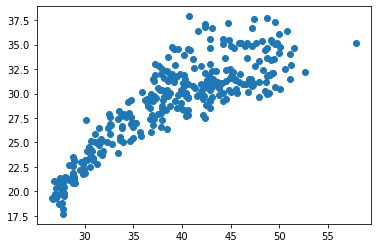

In [37]:
#plotting relationship b/w Heat Index and Temperature
plt.scatter(df_test['Heat Index'],df_test['Temperature'])
plt.show()

In [38]:
#handling numerical missing values for test dataset
heat_df=df_test[['Temperature','Heat Index']]

heat_without_null=heat_df[heat_df['Heat Index'].isna()==False]

X=heat_without_null['Temperature']
y=heat_without_null['Heat Index']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

linreg.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
pred=linreg.predict(np.array(X_test).reshape(-1,1))

from sklearn.svm import SVR
svr=SVR()

svr.fit(np.array(X_train).reshape(-1,1),np.array(y_train))
svr_pred=svr.predict(np.array(X_test).reshape(-1,1))

from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()

rfreg.fit(np.array(X_train).reshape(-1,1),np.array(y_train))
rf_pred=rfreg.predict(np.array(X_test).reshape(-1,1))

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))

print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))

MAE: 2.8094288435980603
MSE: 12.727349803888908
MAE: 2.9700875378094143
MSE: 16.23898479693311
MAE: 2.761087107359877
MSE: 13.693189329605774


In [40]:
heat_null=heat_df[heat_df['Heat Index'].isna()]

W=heat_null['Temperature']
Z=heat_null['Heat Index']

predictions_test=linreg.predict(np.array(W).reshape(-1,1))

In [41]:
heat_test=pd.DataFrame(predictions_test,columns=['Heat Index'])
heat_test.index=heat_null.index

#filling missing values in dataframe with the predicted heat index value
df_test['Heat Index'].fillna(heat_test['Heat Index'],inplace=True)

#Rounding off Heat Index Values to 2 decimal places
df_test['Heat Index']=round(df_test['Heat Index'],2)
df_test

C:\Users\karan rawat\.conda\envs\myenv\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\karan rawat\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
309,5,11,2016,16.2,29.0,21.6,28.80,13.0,117.58,0.1,0.0,71.75,1010.3,15.8,Clear
285,12,10,2016,21.0,34.8,27.6,34.70,21.3,214.63,3.0,0.0,53.42,1005.8,16.5,Clear
919,8,7,2018,29.1,40.0,35.2,46.10,13.0,121.26,3.4,21.0,52.17,995.6,23.3,Clear
120,30,4,2016,23.3,40.3,32.3,38.40,14.2,203.04,2.3,0.0,23.50,1004.2,7.8,Clear
585,8,8,2017,27.1,34.9,30.2,46.80,12.7,89.21,2.9,67.0,83.45,1001.4,26.9,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,25,6,2017,30.3,39.2,34.8,50.10,11.2,78.92,3.3,31.3,58.98,997.3,25.3,Partially cloudy
1864,7,2,2021,10.1,21.9,15.4,21.73,13.2,249.54,1.6,2.2,80.15,1018.0,11.6,Clear
622,14,9,2017,28.2,35.0,31.6,44.90,9.4,122.71,2.8,42.1,69.02,1005.8,25.0,Partially cloudy
1070,6,12,2018,10.0,24.8,16.7,23.39,8.5,117.04,1.9,13.7,73.96,1014.6,11.4,Clear


# Handling Categorical Data

In [42]:
#ordinal encoding
condition_dict={'Clear':1,'Partially cloudy':2,'Overcast':3,'Rain':4}

In [43]:
condition_dict

{'Clear': 1, 'Partially cloudy': 2, 'Overcast': 3, 'Rain': 4}

In [44]:
df_train['Condition1']=df_train['Condition1'].map(condition_dict)
df_test['Condition1']=df_test['Condition1'].map(condition_dict)

C:\Users\karan rawat\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\karan rawat\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df_train.head()

,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
1322,15,8,2019,25.3,34.4,30.4,45.10,18.3,107.04,3.1,68.3,80.96,1000.6,26.6,4
1567,16,4,2020,23.6,39.0,30.8,38.20,16.6,247.63,3.4,34.4,33.62,1005.9,12.1,2
953,11,8,2018,28.0,35.0,31.7,46.70,18.4,244.83,3.4,79.5,74.81,997.0,26.5,4
1117,22,1,2019,13.0,18.0,15.2,30.29,22.3,95.38,1.8,66.9,94.96,1014.2,14.4,4
1994,17,6,2021,28.0,35.7,31.3,40.90,18.4,99.79,3.4,52.3,67.76,999.6,24.3,4


In [46]:
df_train.isnull().sum()

day                    0
month                  0
year                   0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Heat Index             0
Wind Speed             0
Wind Direction         0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Sea Level Pressure     0
Dew Point              0
Condition1             0
dtype: int64

In [47]:
df_test.head()

,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
309,5,11,2016,16.2,29.0,21.6,28.8,13.0,117.58,0.1,0.0,71.75,1010.3,15.8,1
285,12,10,2016,21.0,34.8,27.6,34.7,21.3,214.63,3.0,0.0,53.42,1005.8,16.5,1
919,8,7,2018,29.1,40.0,35.2,46.1,13.0,121.26,3.4,21.0,52.17,995.6,23.3,1
120,30,4,2016,23.3,40.3,32.3,38.4,14.2,203.04,2.3,0.0,23.50,1004.2,7.8,1
585,8,8,2017,27.1,34.9,30.2,46.8,12.7,89.21,2.9,67.0,83.45,1001.4,26.9,4


In [48]:
df_test.isnull().sum()

day                    0
month                  0
year                   0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Heat Index             0
Wind Speed             0
Wind Direction         0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Sea Level Pressure     0
Dew Point              0
Condition1             0
dtype: int64

# Handling Imbalance Dataset

<AxesSubplot:xlabel='Condition1', ylabel='count'>

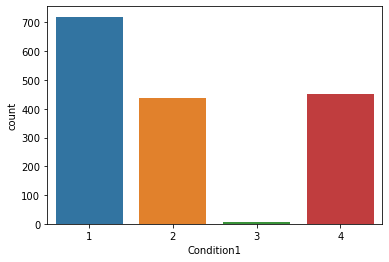

In [49]:
sns.countplot(x='Condition1',data=df_train)

In [50]:
df_train['Condition1'].value_counts()

1    720
4    450
2    436
3      6
Name: Condition1, dtype: int64

In [51]:
#handle imbalance dataset for train data 
X=df_train.drop(['Condition1'],axis=1)

y=df_train['Condition1']

In [52]:
X.shape,y.shape

((1612, 14), (1612,))

In [53]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_res, y_res = smt.fit_resample(X, y)

In [54]:
X_res.shape,y_res.shape

((2880, 14), (2880,))

In [55]:
from collections import Counter
print('Original Data shape {}'.format(Counter(y)))
print('Resampled Data shape {}'.format(Counter(y_res)))

Original Data shape Counter({1: 720, 4: 450, 2: 436, 3: 6})
Resampled Data shape Counter({4: 720, 2: 720, 1: 720, 3: 720})


In [56]:
df_train=pd.concat([X_res,y_res],axis=1)

In [57]:
df_train.head()

,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,15,8,2019,25.3,34.4,30.4,45.10,18.3,107.04,3.1,68.3,80.96,1000.6,26.6,4
1,16,4,2020,23.6,39.0,30.8,38.20,16.6,247.63,3.4,34.4,33.62,1005.9,12.1,2
2,11,8,2018,28.0,35.0,31.7,46.70,18.4,244.83,3.4,79.5,74.81,997.0,26.5,4
3,22,1,2019,13.0,18.0,15.2,30.29,22.3,95.38,1.8,66.9,94.96,1014.2,14.4,4
4,17,6,2021,28.0,35.7,31.3,40.90,18.4,99.79,3.4,52.3,67.76,999.6,24.3,4


<AxesSubplot:xlabel='Condition1', ylabel='count'>

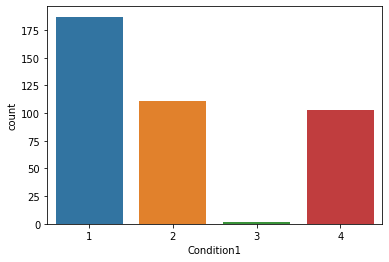

In [58]:
sns.countplot(x='Condition1',data=df_test)

In [59]:
#handle imbalance dataset for test data 
X=df_test.drop(['Condition1'],axis=1)

y=df_test['Condition1']

In [60]:
X.shape,y.shape

((403, 14), (403,))

In [61]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(k_neighbors=1)
X_res1, y_res1 = smt.fit_resample(X, y)

In [62]:
X_res1.shape,y_res1.shape

((748, 14), (748,))

In [63]:
print('Original Data shape {}'.format(Counter(y)))
print('Resampled Data shape {}'.format(Counter(y_res1)))

Original Data shape Counter({1: 187, 2: 111, 4: 103, 3: 2})
Resampled Data shape Counter({1: 187, 4: 187, 2: 187, 3: 187})


In [64]:
df_test=pd.concat([X_res1,y_res1],axis=1)

In [65]:
df_test.head()

,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,5,11,2016,16.2,29.0,21.6,28.8,13.0,117.58,0.1,0.0,71.75,1010.3,15.8,1
1,12,10,2016,21.0,34.8,27.6,34.7,21.3,214.63,3.0,0.0,53.42,1005.8,16.5,1
2,8,7,2018,29.1,40.0,35.2,46.1,13.0,121.26,3.4,21.0,52.17,995.6,23.3,1
3,30,4,2016,23.3,40.3,32.3,38.4,14.2,203.04,2.3,0.0,23.50,1004.2,7.8,1
4,8,8,2017,27.1,34.9,30.2,46.8,12.7,89.21,2.9,67.0,83.45,1001.4,26.9,4


# Feature Selection

**feature selection for condition1**

In [66]:
X_train=df_train.drop(['Condition1'],axis=1)
y_train=df_train['Condition1']

X_test=df_test.drop(['Condition1'],axis=1)
y_test=df_test['Condition1']

In [67]:
#Filter method for feature selection
#lets perform ANOVA statistical test
from sklearn.feature_selection import f_classif
model=f_classif(X_train,y_train)
model

(array([  11.44503353,    5.16983244,   49.53025062,  290.53248797,
          29.61823086,  116.58830901,  206.72956823,   46.07040565,
          52.58767506,   53.50259023, 5169.10703802,  123.99837789,
         269.20588543,  417.269041  ]),
 array([1.85292043e-007, 1.45567164e-003, 3.30989805e-031, 9.92923299e-165,
        7.44893231e-019, 2.98415844e-071, 2.02118376e-121, 4.48638885e-029,
        4.37500241e-033, 1.20148086e-033, 0.00000000e+000, 1.57608879e-075,
        5.47097273e-154, 5.08889253e-225]))

In [68]:
p_values=pd.Series(model[1])
p_values.index=X_train.columns
p_values.sort_values(ascending=True)

Cloud Cover             0.000000e+00
Dew Point              5.088893e-225
Minimum Temperature    9.929233e-165
Sea Level Pressure     5.470973e-154
Heat Index             2.021184e-121
Relative Humidity       1.576089e-75
Temperature             2.984158e-71
Visibility              1.201481e-33
Wind Direction          4.375002e-33
year                    3.309898e-31
Wind Speed              4.486389e-29
Maximum Temperature     7.448932e-19
day                     1.852920e-07
month                   1.455672e-03
dtype: float64

In [69]:
#to check for only significant features where the p-value is less than 0.05
p_values[p_values<0.05].sort_values(ascending=True)

Cloud Cover             0.000000e+00
Dew Point              5.088893e-225
Minimum Temperature    9.929233e-165
Sea Level Pressure     5.470973e-154
Heat Index             2.021184e-121
Relative Humidity       1.576089e-75
Temperature             2.984158e-71
Visibility              1.201481e-33
Wind Direction          4.375002e-33
year                    3.309898e-31
Wind Speed              4.486389e-29
Maximum Temperature     7.448932e-19
day                     1.852920e-07
month                   1.455672e-03
dtype: float64

In [70]:
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=10)
fs.fit_transform(X_train,y_train)
X_train.columns[fs.get_support()]

Index(['year', 'Minimum Temperature', 'Temperature', 'Heat Index',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity',
       'Sea Level Pressure', 'Dew Point'],
      dtype='object')

In [71]:
X_train.columns[fs.get_support()]

Index(['year', 'Minimum Temperature', 'Temperature', 'Heat Index',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity',
       'Sea Level Pressure', 'Dew Point'],
      dtype='object')

So after performing anova test we can infer that all the features are significant but Cloud Cover and dew point are more significant for predicting the target feature.

In [72]:
selected_features=['Minimum Temperature', 'Temperature', 'Heat Index', 'Wind Speed',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity',
       'Sea Level Pressure', 'Dew Point']

In [73]:
X_train=X_train.loc[:,selected_features]

In [74]:
X_train.head()

,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point
0,25.3,30.4,45.10,18.3,107.04,3.1,68.3,80.96,1000.6,26.6
1,23.6,30.8,38.20,16.6,247.63,3.4,34.4,33.62,1005.9,12.1
2,28.0,31.7,46.70,18.4,244.83,3.4,79.5,74.81,997.0,26.5
3,13.0,15.2,30.29,22.3,95.38,1.8,66.9,94.96,1014.2,14.4
4,28.0,31.3,40.90,18.4,99.79,3.4,52.3,67.76,999.6,24.3


**Feature Importance method**

In [75]:
X_feat=df_train.drop(['Condition1'],axis=1)
y_feat=df_train['Condition1']

#Embedded method for feature selection
#Feature Importance using Extra Regressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X_feat,y_feat)

ExtraTreesRegressor()

In [76]:
print(selection.feature_importances_)

[0.02613262 0.0221668  0.02241052 0.02328001 0.01808158 0.02142838
 0.01763334 0.03999179 0.03334834 0.02543936 0.58806739 0.05839725
 0.02894803 0.07467459]


<AxesSubplot:>

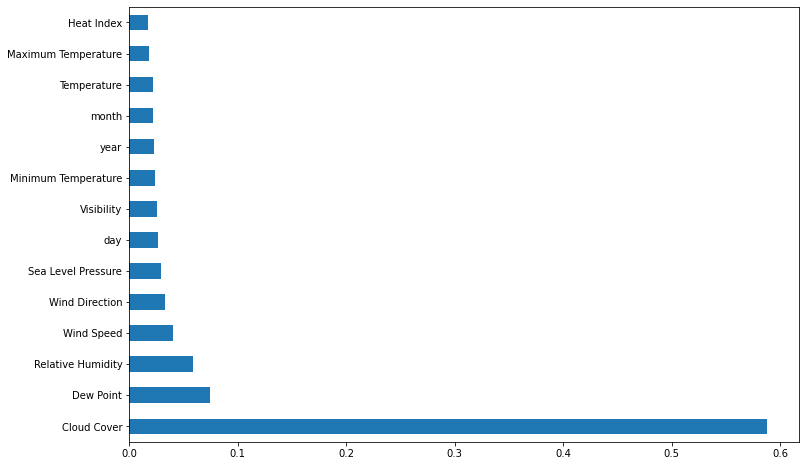

In [77]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_feat.columns)
feat_importances.nlargest(20).plot(kind='barh')

**X_train,X_test,y_train,y_test data preparation**

In [78]:
X_train.head()

,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point
0,25.3,30.4,45.10,18.3,107.04,3.1,68.3,80.96,1000.6,26.6
1,23.6,30.8,38.20,16.6,247.63,3.4,34.4,33.62,1005.9,12.1
2,28.0,31.7,46.70,18.4,244.83,3.4,79.5,74.81,997.0,26.5
3,13.0,15.2,30.29,22.3,95.38,1.8,66.9,94.96,1014.2,14.4
4,28.0,31.3,40.90,18.4,99.79,3.4,52.3,67.76,999.6,24.3


In [79]:
y_train=df_train['Condition1']

X_test=df_test[selected_features]
y_test=df_test['Condition1']

In [80]:
y_train.head()

0    4
1    2
2    4
3    4
4    4
Name: Condition1, dtype: int64

In [81]:
X_test.head()

,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point
0,16.2,21.6,28.8,13.0,117.58,0.1,0.0,71.75,1010.3,15.8
1,21.0,27.6,34.7,21.3,214.63,3.0,0.0,53.42,1005.8,16.5
2,29.1,35.2,46.1,13.0,121.26,3.4,21.0,52.17,995.6,23.3
3,23.3,32.3,38.4,14.2,203.04,2.3,0.0,23.50,1004.2,7.8
4,27.1,30.2,46.8,12.7,89.21,2.9,67.0,83.45,1001.4,26.9


In [82]:
y_test.head()

0    1
1    1
2    1
3    1
4    4
Name: Condition1, dtype: int64

# Feature Scaling

In [83]:
#scaling down Train data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.4787131 ,  0.56039749,  0.96431686, ...,  1.10696561,
        -0.76640691,  1.29794847],
       [ 0.25085836,  0.61856773, -0.00863095, ..., -1.99633765,
        -0.05706597, -0.91835031],
       [ 0.84060005,  0.74945076,  1.18992794, ...,  0.70381151,
        -1.24822339,  1.28266365],
       ...,
       [ 0.46984991,  0.25986246,  0.22676085, ...,  1.47503763,
        -0.83307838,  1.17563458],
       [ 0.90472131,  0.74089954,  1.32156979, ...,  0.82541536,
        -0.94987024,  1.33811648],
       [ 0.51209004,  0.35406386,  0.6011811 , ...,  0.97033385,
        -0.7524994 ,  1.00927472]])

In [84]:
#scaling down Test data
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[-0.74097994, -0.71934776, -1.33409609, ...,  0.50321777,
         0.53182085, -0.352812  ],
       [-0.09762537,  0.15320582, -0.50215521, ..., -0.69837811,
        -0.07044976, -0.24581827],
       [ 0.98803548,  1.25844035,  1.10532379, ..., -0.78032   ,
        -1.43559647,  0.79354944],
       ...,
       [ 0.69341071,  0.44298903,  0.79704176, ...,  1.14390503,
        -0.42481706,  1.20595893],
       [ 0.61312005,  0.37001194,  0.55906803, ...,  0.98644191,
        -0.5064487 ,  1.05166678],
       [-1.33419231, -1.50147483, -2.18318357, ...,  0.32183447,
         0.59915018, -1.22467159]])

In [85]:
df_Xscaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [86]:
df_train_scaled=pd.concat([df_Xscaled,y_train.reset_index(drop=True)],axis=1)

In [87]:
df_train_scaled.head()

,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,0.478713,0.560397,0.964317,0.265737,-0.963313,0.556910,0.717641,1.106966,-0.766407,1.297948,4
1,0.250858,0.618568,-0.008631,-0.057886,1.261831,0.959099,-0.437629,-1.996338,-0.057066,-0.918350,2
2,0.840600,0.749451,1.189928,0.284773,1.217515,0.959099,1.099323,0.703812,-1.248223,1.282664,4
3,-1.169883,-1.650072,-1.123996,1.027202,-1.147858,-1.185911,0.669931,2.024715,1.053789,-0.566799,4
4,0.840600,0.691281,0.372088,0.284773,-1.078060,0.959099,0.172381,0.241659,-0.900245,0.946398,4


In [88]:
df_Xscaledtest=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [89]:
df_test_scaled=pd.concat([df_Xscaledtest,y_test.reset_index(drop=True)],axis=1)

In [90]:
df_test_scaled.head()

,Minimum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,-0.740980,-0.719348,-1.334096,-0.743205,-0.796494,-3.464985,-1.609938,0.503218,0.531821,-0.352812,1
1,-0.097625,0.153206,-0.502155,0.836836,0.739534,0.422846,-1.609938,-0.698378,-0.070450,-0.245818,1
2,0.988035,1.258440,1.105324,-0.743205,-0.738250,0.959099,-0.894284,-0.780320,-1.435596,0.793549,1
3,0.210649,0.836706,0.019570,-0.514765,0.556097,-0.515596,-1.609938,-2.659739,-0.284590,-1.575598,1
4,0.719971,0.531312,1.204029,-0.800315,-1.245511,0.288783,0.673339,1.270194,-0.659337,1.343803,4


In [91]:
X_train=df_train_scaled.drop(['Condition1'],axis=1)
y_train=df_train_scaled['Condition1']

X_test=df_test_scaled.drop(['Condition1'],axis=1)
y_test=df_test_scaled['Condition1']

# Fitting ML Model

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_pred= clf_rf.predict(X_test)

In [95]:
y_pred

array([1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 4, 4,
       1, 1, 1, 2, 1, 1, 1, 2, 4, 4, 2, 1, 1, 2, 4, 2, 2, 1, 1, 4, 2, 2,
       1, 4, 2, 2, 1, 1, 1, 4, 1, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 1, 2, 4,
       1, 2, 2, 4, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 2, 2, 2, 4, 2, 2, 1, 2, 2, 4, 1, 1,
       2, 4, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 4, 1, 1, 4, 1, 4, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 4, 1, 2, 2, 2, 1, 4, 4,
       1, 2, 2, 1, 2, 2, 1, 4, 1, 1, 2, 1, 2, 4, 4, 4, 1, 1, 2, 4, 2, 2,
       2, 2, 4, 1, 2, 2, 2, 4, 2, 1, 1, 4, 4, 1, 4, 2, 1, 1, 4, 1, 2, 2,
       4, 4, 2, 2, 1, 4, 1, 1, 4, 4, 2, 1, 2, 2, 4, 1, 4, 4, 2, 4, 2, 4,
       1, 1, 1, 4, 2, 2, 1, 1, 4, 1, 1, 1, 4, 2, 1, 1, 4, 2, 1, 1, 1, 4,
       2, 4, 2, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, 1, 1, 2, 2, 1, 4, 4, 4,
       2, 1, 1, 2, 2, 2, 4, 2, 1, 1, 4, 2, 4, 4, 2, 2, 4, 2, 1, 1, 1, 4,
       1, 4, 2, 1, 1, 4, 1, 4, 1, 1, 4, 2, 4, 2, 1,

In [96]:
from sklearn import metrics

In [97]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

0.8275401069518716
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       187
           2       0.81      0.87      0.84       187
           3       0.98      0.67      0.80       187
           4       0.63      0.77      0.69       187

    accuracy                           0.83       748
   macro avg       0.85      0.83      0.83       748
weighted avg       0.85      0.83      0.83       748



array([[187,   0,   0,   0],
       [  0, 162,   0,  25],
       [  0,   0, 126,  61],
       [  3,  38,   2, 144]], dtype=int64)

In [98]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

C:\Users\karan rawat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [99]:
y_pred=log.predict(X_test)
y_pred

array([1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 4, 4,
       1, 1, 1, 2, 1, 1, 1, 4, 4, 4, 4, 1, 1, 2, 4, 2, 3, 1, 1, 4, 2, 4,
       1, 4, 2, 2, 1, 1, 1, 4, 1, 4, 1, 4, 2, 2, 2, 4, 4, 4, 2, 1, 2, 4,
       1, 2, 4, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 2, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 2, 2, 2, 3, 4, 2, 1, 4, 2, 4, 1, 1,
       2, 3, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 4, 2, 1, 2, 1, 4, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 4, 1, 2, 2, 2, 1, 4, 4,
       1, 4, 2, 1, 2, 4, 1, 4, 1, 2, 2, 1, 2, 4, 4, 4, 1, 1, 2, 4, 4, 2,
       4, 2, 4, 1, 2, 4, 2, 4, 2, 2, 1, 4, 4, 1, 2, 2, 1, 1, 4, 1, 2, 2,
       4, 4, 2, 2, 1, 4, 1, 1, 4, 2, 2, 1, 2, 2, 4, 1, 3, 4, 2, 4, 2, 3,
       1, 1, 1, 4, 2, 2, 1, 1, 4, 1, 1, 1, 4, 2, 4, 1, 3, 2, 1, 1, 1, 4,
       4, 4, 4, 2, 4, 1, 1, 1, 1, 4, 4, 3, 1, 3, 1, 1, 2, 2, 1, 4, 4, 4,
       2, 1, 1, 2, 2, 2, 4, 2, 1, 1, 3, 2, 4, 4, 4, 2, 4, 2, 1, 1, 1, 4,
       1, 4, 2, 1, 1, 4, 1, 2, 1, 1, 4, 2, 4, 2, 1,

In [100]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
metrics.confusion_matrix(y_test,y_pred)

0.8489304812834224
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       187
           2       0.76      0.72      0.74       187
           3       0.90      1.00      0.95       187
           4       0.73      0.70      0.72       187

    accuracy                           0.85       748
   macro avg       0.85      0.85      0.85       748
weighted avg       0.85      0.85      0.85       748



array([[182,   5,   0,   0],
       [  0, 135,   4,  48],
       [  0,   0, 187,   0],
       [  2,  38,  16, 131]], dtype=int64)

# Hyper Parameter Optimization

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
C=[0.0001,0.001,0.01,0.1,1.0,10]
solver=['newton-cg']
multi_class=['ovr','multinomial']
penalty= ['l1', 'l2', 'elasticnet']

In [103]:
random_grid = {'C': C,
               'solver': solver,
               'multi_class': multi_class,
               'penalty': penalty
              }

In [104]:
grid_search=GridSearchCV(estimator=log,param_grid=random_grid,scoring='accuracy',cv=5,n_jobs=-1)

In [105]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg']},
             scoring='accuracy')

In [106]:
grid_search.best_params_

{'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}

In [107]:
grid_search.best_score_

0.8527777777777776

In [108]:
prediction=grid_search.predict(X_test)
prediction

array([1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 4, 4,
       1, 1, 1, 2, 1, 1, 1, 4, 4, 4, 4, 1, 1, 2, 4, 2, 3, 1, 1, 4, 2, 4,
       1, 4, 2, 2, 1, 1, 1, 4, 1, 4, 1, 4, 2, 2, 2, 4, 4, 4, 2, 1, 2, 4,
       1, 2, 4, 3, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 1, 1, 2, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 2, 2, 2, 3, 4, 2, 1, 4, 2, 4, 1, 1,
       2, 3, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 4, 2, 1, 2, 1, 4, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 2, 4, 1, 2, 2, 2, 1, 4, 4,
       1, 4, 2, 1, 2, 4, 1, 4, 1, 2, 2, 1, 2, 4, 4, 4, 1, 1, 2, 4, 4, 2,
       4, 2, 4, 1, 2, 4, 2, 4, 2, 2, 1, 4, 4, 1, 2, 2, 1, 1, 4, 1, 2, 2,
       4, 4, 2, 2, 1, 4, 1, 1, 4, 2, 2, 1, 2, 2, 4, 1, 3, 4, 2, 4, 2, 3,
       1, 1, 1, 4, 2, 2, 1, 1, 4, 2, 1, 1, 4, 2, 2, 1, 3, 2, 1, 1, 1, 4,
       2, 4, 4, 2, 4, 1, 1, 1, 1, 4, 4, 4, 1, 3, 1, 1, 2, 2, 1, 4, 4, 4,
       2, 1, 1, 2, 2, 2, 4, 2, 1, 1, 3, 2, 4, 4, 4, 2, 4, 2, 1, 1, 1, 4,
       1, 4, 2, 1, 1, 4, 1, 2, 1, 1, 4, 2, 4, 2, 1,

In [109]:
print(metrics.accuracy_score(y_test,prediction))
print(metrics.classification_report(y_test,prediction))
metrics.confusion_matrix(y_test,prediction)

0.856951871657754
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       187
           2       0.76      0.74      0.75       187
           3       0.93      1.00      0.96       187
           4       0.75      0.72      0.73       187

    accuracy                           0.86       748
   macro avg       0.85      0.86      0.86       748
weighted avg       0.85      0.86      0.86       748



array([[181,   6,   0,   0],
       [  0, 139,   3,  45],
       [  0,   0, 187,   0],
       [  2,  39,  12, 134]], dtype=int64)

# Save the model in pickle file to reuse it again

In [110]:
import pickle
#open a file where you want to store the data
file = open('delhiweather.pkl','wb')

#dump information
pickle.dump(grid_search,file)

In [111]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

['scaler.save']

In [112]:
july=pd.read_csv('julynew.csv')

In [113]:
july.drop(['Unnamed: 0'],axis=1,inplace=True)

In [114]:
july

,day,month,year,Minimum Temperature,Maximum Temperature,Temperature,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Sea Level Pressure,Dew Point,Condition1
0,6,7,2021,30.0,40.0,34.7,46.7,14.8,263.00,3.5,41.0,51.31,1000.8,22.7,Partially cloudy
1,7,7,2021,31.1,42.0,36.4,47.0,18.4,230.46,3.8,29.7,46.25,999.4,22.3,Partially cloudy
2,8,7,2021,28.1,41.0,36.1,47.0,22.3,244.42,3.5,38.8,44.46,999.3,21.6,Rain
3,9,7,2021,29.2,38.0,33.0,48.6,22.3,93.50,3.5,57.0,58.72,1000.7,23.7,Rain
4,10,7,2021,30.0,38.0,34.4,45.7,18.4,92.17,3.8,41.2,58.86,1000.7,24.8,Partially cloudy
5,11,7,2021,30.0,38.0,33.6,48.8,36.0,95.65,3.6,60.2,65.39,1002.1,25.9,Partially cloudy
6,12,7,2021,29.0,36.0,31.7,44.8,27.7,105.00,3.0,88.0,74.01,1004.0,26.2,Overcast
7,13,7,2021,26.0,32.0,29.5,44.0,14.8,64.57,2.8,91.0,86.83,1003.6,27.0,Overcast
8,14,7,2021,25.4,34.8,28.1,46.0,27.7,99.17,3.1,86.9,91.39,1002.8,26.5,Rain
9,15,7,2021,25.0,35.2,30.5,48.7,16.6,62.92,3.2,49.8,79.14,1003.0,26.1,Partially cloudy


In [115]:
X_new=july[selected_features]

In [116]:
X_scaled=scaler.transform(X_new)

In [117]:
X_scaled

array([[ 1.10866446,  1.18572755,  1.18992794, -0.40054542,  1.50509501,
         1.0931621 , -0.21270911, -0.83669602, -0.73963932,  0.70184052],
       [ 1.25609988,  1.43295107,  1.23223002,  0.28477332,  0.99007845,
         1.49535151, -0.59779909, -1.16839679, -0.9270124 ,  0.64070124],
       [ 0.85400327,  1.38932339,  1.23223002,  1.02720195,  1.21102593,
         1.0931621 , -0.28768238, -1.28573758, -0.94039619,  0.53370751],
       [ 1.0014387 ,  0.93850404,  1.45784111,  1.02720195, -1.17761262,
         1.0931621 ,  0.33255103, -0.3509445 , -0.75302311,  0.85468871],
       [ 1.10866446,  1.14209987,  1.04892101,  0.28477332, -1.19866278,
         1.49535151, -0.20589336, -0.34176701, -0.75302311,  1.02282172],
       [ 1.10866446,  1.0257594 ,  1.48604249,  3.63522047, -1.14358418,
         1.22722524,  0.44160306,  0.08629743, -0.56565004,  1.19095473],
       [ 0.97463226,  0.74945076,  0.92201478,  2.05518005, -0.99560001,
         0.42284642,  1.38899257,  0.6513687 

In [118]:
prediction=log.predict(X_scaled)

In [119]:
prediction

array([2, 2, 2, 4, 2, 4, 3, 3, 4, 4], dtype=int64)

In [120]:
prediction=grid_search.predict(X_scaled)

In [121]:
prediction

array([2, 2, 2, 4, 2, 4, 3, 3, 4, 4], dtype=int64)